### Data Exploration

Spend some time querying the data, and making yourself familiar with it using the EDA techniques we learned in class.  Show your EDA in the Jupyter notebook you will use for uploading to Github.  Look at the types of complaints, read some descriptions, see the earliest date, the latest date etc.  Read the data dictionary to understand what the columns mean.  Be aware that many columns have NaN values, and they may not get counted for your analysis.

In [3]:
import pandas as pd

/tmp/ipykernel_4338/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
df = pd.read_pickle('shared/Project-3_NYC_311_Calls.pkl')

In [ ]:
df.head(5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780977 entries, 0 to 33780976
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            datetime64[ns]
 2   Agency                  object        
 3   Agency Name             object        
 4   Complaint Type          object        
 5   Descriptor              object        
 6   Location Type           object        
 7   Incident Zip            object        
 8   City                    object        
 9   Resolution Description  object        
 10  Borough                 object        
 11  Open Data Channel Type  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 3.0+ GB


In [7]:
df.isnull().sum()

Unique Key                      0
Created Date                    0
Agency                          0
Agency Name                     0
Complaint Type                  0
Descriptor                 586677
Location Type             7140574
Incident Zip              1507958
City                      1981664
Resolution Description    1254890
Borough                     47074
Open Data Channel Type          0
dtype: int64

In [10]:
#df.dropna(inplace = True)

In [11]:
print(df['Created Date'].max())
print(df['Created Date'].min())

2023-08-04 12:00:00
2010-01-01 00:00:00


In [8]:
df.head(2)

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Open Data Channel Type
0,20184537,2011-04-06,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10002.0,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN
1,20184538,2011-04-06,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11236.0,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN


### Question 1 (0.5 points) 
What is the average number of daily complaints received in 2022?

(hint: use daily resampling on a column, for example, on the 'Unique Key' column as that has no missing values)

In [12]:
count_22 = df[df['Created Date'].dt.year == 2022]
count_22 = count_22.groupby(df['Created Date'].dt.date).count()

In [13]:
count_22.head(10)

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Open Data Channel Type
Created Date,,,,,,,,,,,,
2022-01-01,4984,4984,4984,4984,4984,4984,4984,4984,4984,4984,4984,4984
2022-01-02,5646,5646,5646,5646,5646,5646,5646,5646,5646,5646,5646,5646
2022-01-03,7479,7479,7479,7479,7479,7479,7479,7479,7479,7479,7479,7479
2022-01-04,7751,7751,7751,7751,7751,7751,7751,7751,7751,7751,7751,7751
2022-01-05,6787,6787,6787,6787,6787,6787,6787,6787,6787,6787,6787,6787
2022-01-06,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025,7025
2022-01-07,5785,5785,5785,5785,5785,5785,5785,5785,5785,5785,5785,5785
2022-01-08,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819
2022-01-09,6198,6198,6198,6198,6198,6198,6198,6198,6198,6198,6198,6198


In [14]:
count_22['Unique Key'].mean()

6805.479452054795

### Question 2 (0.5 points) 
On which single date were the maximum number of calls received?

In [15]:
count = df[['Created Date','Unique Key']].groupby(df['Created Date'].dt.date).count()

In [11]:
count.head(10)

,Created Date,Unique Key
Created Date,,
2010-01-01,2942,2942
2010-01-02,3958,3958
2010-01-03,5676,5676
2010-01-04,9763,9763
2010-01-05,8735,8735
2010-01-06,7178,7178
2010-01-07,7105,7105
2010-01-08,6290,6290
2010-01-09,4020,4020


### Question 3 
On the date the maximum number of calls were received, what was the most important complaint type?

(Might be fun to search online for why so many such calls were received on that day?)

In [20]:
call = df[df['Created Date'].dt.year == 2020]
call = call[call['Created Date'].dt.month == 8]
call = call[call['Created Date'].dt.day == 4]

In [18]:
#df['Created Date'].dt.date

0           2011
1           2011
2           2011
3           2022
4           2011
            ... 
33780972    2011
33780973    2011
33780974    2011
33780975    2011
33780976    2011
Name: Created Date, Length: 33780977, dtype: int32

In [21]:
call.value_counts('Complaint Type')

Complaint Type
Damaged Tree                           14863
Noise - Residential                      982
Request Large Bulky Item Collection      909
Street Light Condition                   617
Overgrown Tree/Branches                  609
                                       ...  
For Hire Vehicle Report                    1
LinkNYC                                    1
Public Payphone Complaint                  1
Peeling Paint                              1
Window Guard                               1
Name: count, Length: 125, dtype: int64

### Question 4 (0.5 points) 
Quietest month: Group the data by months, and identify the month that historically has the fewest number of calls.

In [22]:
count = df[['Created Date','Unique Key']].groupby(df['Created Date'].dt.month).count()
count = count.sort_values(by='Unique Key', ascending = False)

In [25]:
count.sort_values('Unique Key')

,Created Date,Unique Key
Created Date,,
12,2596986,2596986
2,2621845,2621845
11,2634749,2634749
4,2672760,2672760
9,2684271,2684271
10,2766887,2766887
8,2779862,2779862
3,2868044,2868044
5,2956598,2956598


### Question 5 (1 point) 
Resample your time series to a daily frequency.  Perform ETS decomposition based on an additive model.  What is the value of the seasonal component on 2020-12-25 (rounded to the nearest integer)?

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

,Created Date,Unique Key
0,2010-01-01,2942
1,2010-01-02,3958
2,2010-01-03,5676
3,2010-01-04,9763
4,2010-01-05,8735
...,...,...
4959,2023-07-31,9921
4960,2023-08-01,9813
4961,2023-08-02,9245
4962,2023-08-03,9128


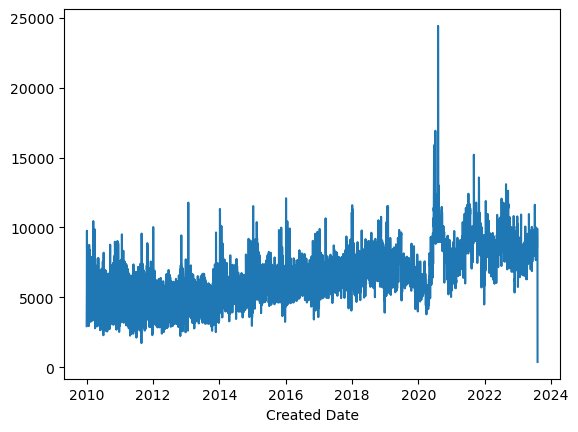

In [58]:
count.plot()
#df_count

In [23]:
count.index = pd.to_datetime(count.index)
#count = count['Unique Key']
count

Created Date
2010-01-01    2518
2010-01-02    3406
2010-01-03    4966
2010-01-04    7726
2010-01-05    6500
              ... 
2023-07-31    6775
2023-08-01    6517
2023-08-02    6161
2023-08-03    5290
2023-08-04     217
Name: Unique Key, Length: 4964, dtype: int64

In [24]:
final = seasonal_decompose(count, model='additive')

<Axes: xlabel='Created Date'>

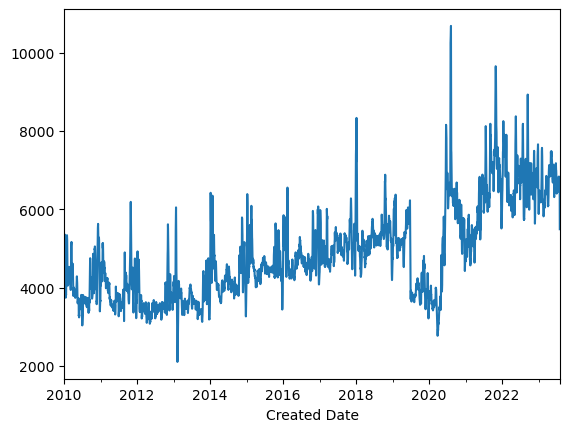

In [25]:
final.trend.plot()

In [26]:
# Extract the seasonal component for the date 2020-12-25
seasonal_component = final.seasonal.loc['2020-12-25'].round().astype(int)

seasonal_component

81

### Question 6 (1.5 points) 
Calculate the autocorrelation of the number of daily calls with the number of calls the day prior, ie lag of 1.  (Use the daily series).

In [13]:
# Calculate the autocorrelation with a lag of 1
autocorr_1 = count['Unique Key'].autocorr(lag=1)
autocorr_1

0.7517059728398577

### Question 7 (1.5 points) 
Forecast the daily series with a test set of 90 days using the Prophet library.  What is your RMSE on your test set?

Due to random initialization in several parts of the algorithm, your answer may not exactly match the choices below, but will come close.  Pick the closest number.

In [49]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

In [36]:
#pip install scikit-learn

  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [44]:
# Convert Series to DataFrame
df_count = count.to_frame()

# Reset index to move it back as a column
df_count.reset_index(inplace=True)

# Print the DataFrame to verify
print(df_count.head())


  Created Date  Unique Key
0   2010-01-01        2942
1   2010-01-02        3958
2   2010-01-03        5676
3   2010-01-04        9763
4   2010-01-05        8735


In [50]:
# Assuming your DataFrame is called df and the daily series is prepared
# If not, replace df with your DataFrame name and daily series accordingly

# Prepare the data for Prophet
df_prophet = df_count.rename(columns={'Created Date': 'ds', 'Unique Key': 'y'})
df_prophet = df_prophet[['ds', 'y']]

# Split the data into training and test sets
train = df_prophet[:-90]  # Training set: all data except the last 90 days
test = df_prophet[-90:]   # Test set: last 90 days

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train)

# Make predictions for the test set
future = model.make_future_dataframe(periods=90)  # Forecast for 90 days
forecast = model.predict(future)

# Extract actual values and predicted values for the test set
actual = test['y'].values
predicted = forecast.iloc[-90:]['yhat'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))

print("RMSE on test set:", rmse)

19:55:19 - cmdstanpy - INFO - Chain [1] start processing
19:55:20 - cmdstanpy - INFO - Chain [1] done processing


RMSE on test set: 1233.7823321393885
